In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load csv 
url = 'https://raw.githubusercontent.com/kfern/jupyter/next/covid19-es-and/covid19-es-and.csv'
df = pd.read_csv(url)

In [3]:
df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True)
last_fecha = df['Fecha'].max()

In [4]:
fFechas = pd.date_range(end=last_fecha, freq='7D', periods=4)
filtro = df['Fecha'].isin(fFechas)
dfV = df[filtro].copy()

In [5]:
dfV.set_index(['Provincia', 'Fecha'], inplace=True)
dfV.sort_index(level=['Provincia', 'Fecha'], inplace=True)

In [6]:
dfG = dfV.groupby(level='Provincia').pct_change()*100
dfG.dropna(how='all', inplace=True)
dfG.tail()

Ingresados      Altas      Bajas
Provincia Fecha                                       
Sevilla   2020-04-24    7.213439  40.144231  17.258883
          2020-05-01    6.635945  64.150943   9.090909
Total     2020-04-17   12.364793  94.154489  36.034732
          2020-04-24    7.115893  43.082437  17.765957
          2020-05-01    4.599119  58.667335  11.833785

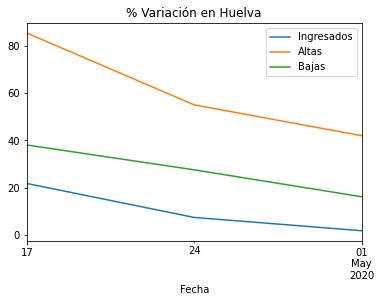

In [7]:
dfG.loc['Huelva'].plot(title='% Variación en Huelva')
plt.show()

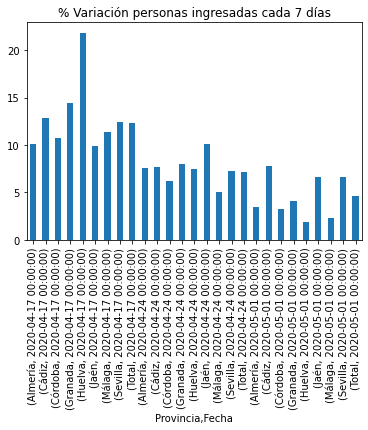

In [8]:
dfG.sort_index(level=['Fecha', 'Provincia'], inplace=True)
dfG['Ingresados'].plot(kind='bar', title='% Variación personas ingresadas cada 7 días')
plt.show()

In [9]:
dfG.describe()

,Ingresados,Altas,Bajas
count,27.000000,27.000000,27.000000
mean,8.257582,66.458094,23.767220
std,4.299517,32.623645,12.941505
min,1.851852,11.111111,5.921053
25%,5.592115,41.086608,12.718668
50%,7.526882,64.150943,17.829457
75%,10.418435,92.910578,35.258745
max,21.818182,127.027027,45.833333


In [10]:
# Nuevos casos cada x días
dfN = dfV.diff()
first_fecha = fFechas.min()

# Se borra la primera fila ya que no tiene valores anteriores y su resultado no tiene sentido
dfN.drop(index=first_fecha, level='Fecha', inplace=True)
# Alternativa seleccionando las filas y borrando
#delete_rows = dfN.loc[(slice(None), [first_fecha]), :].index
#dfN.drop(delete_rows, inplace=True)

# Se borran las filas de Total
dfN.drop(index='Total', level='Provincia', inplace=True)

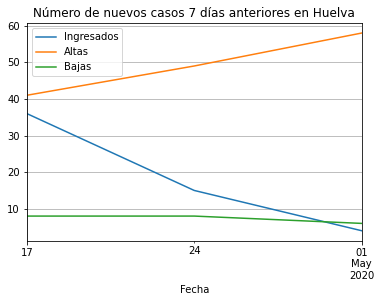

In [11]:
dfN.loc['Huelva'].plot(title='Número de nuevos casos 7 días anteriores en Huelva', grid=True)
plt.show()

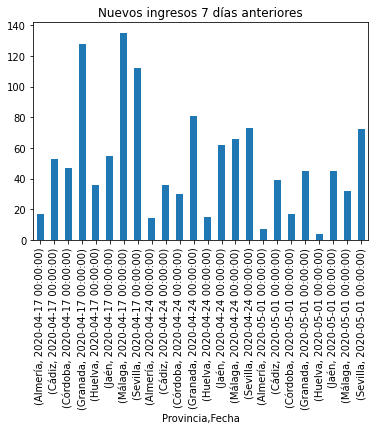

In [12]:
dfN.sort_index(level=['Fecha', 'Provincia'], inplace=True)
dfN['Ingresados'].plot(kind='bar', title='Nuevos ingresos 7 días anteriores')
plt.show()

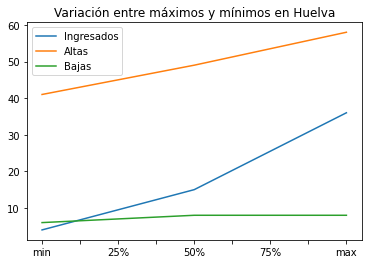

In [13]:
dfN.loc['Huelva'].describe().loc['min':'max'].plot(title='Variación entre máximos y mínimos en Huelva')
plt.show()

In [14]:
print('Nuevos casos en los 7 días anteriores')
print(dfN.sort_index())

Nuevos casos en los 7 días anteriores
                      Ingresados  Altas  Bajas
Provincia Fecha                               
Almería   2020-04-17        17.0   45.0   10.0
          2020-04-24        14.0   78.0    5.0
          2020-05-01         7.0  140.0    4.0
Cádiz     2020-04-17        53.0  132.0   22.0
          2020-04-24        36.0   40.0   21.0
          2020-05-01        39.0   44.0   40.0
Córdoba   2020-04-17        47.0  158.0   22.0
          2020-04-24        30.0   85.0   17.0
          2020-05-01        17.0  459.0   12.0
Granada   2020-04-17       128.0  262.0   43.0
          2020-04-24        81.0  445.0   32.0
          2020-05-01        45.0  609.0   21.0
Huelva    2020-04-17        36.0   41.0    8.0
          2020-04-24        15.0   49.0    8.0
          2020-05-01         4.0   58.0    6.0
Jaén      2020-04-17        55.0  141.0   37.0
          2020-04-24        62.0   28.0   23.0
          2020-05-01        45.0  279.0    9.0
Málaga    2020-04-17  

## Informe Huelva últimos 10 días

In [15]:
provincia = 'Huelva'
dias = 10
data = df.set_index(['Provincia', 'Fecha']).loc[provincia][['Ingresados', 'Altas', 'Bajas']].diff().tail(dias).copy()
titulo = 'Nuevos casos en los últimos ' + str(dias) + ' días en ' + provincia
# Correcciones
# Al ser datos acumulados lo que indica es una corrección en el número de ingresados acumulados a ese día
data.loc['2020-04-25']['Ingresados'] = 0
data.loc['2020-05-01']['Ingresados'] = 0

Nuevos casos en los últimos 10 días en Huelva. (Nuevos ingresos hospitalarios)


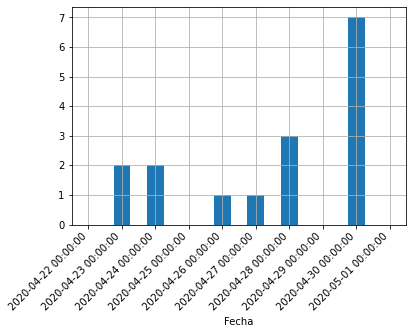

In [16]:
print(titulo + '. (Nuevos ingresos hospitalarios)')
data['Ingresados'].plot(kind='bar', grid=True)
plt.xticks(
    rotation=45,    
    horizontalalignment='right',
    fontweight='light',
)
plt.show()

Nuevos casos en los últimos 10 días en Huelva. (Variación entre mínimos y máximos)


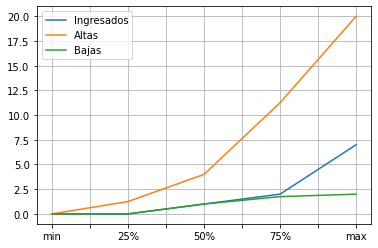

In [17]:
print(titulo + '. (Variación entre mínimos y máximos)')
data.describe().loc['min':'max'].plot(grid=True)
plt.show()

In [18]:
print(titulo)
print(data)

Nuevos casos en los últimos 10 días en Huelva
            Ingresados  Altas  Bajas
Fecha                               
2020-04-22         0.0    0.0    1.0
2020-04-23         2.0    6.0    0.0
2020-04-24         2.0    2.0    2.0
2020-04-25         0.0   12.0    2.0
2020-04-26         1.0    2.0    1.0
2020-04-27         1.0    1.0    0.0
2020-04-28         3.0    1.0    0.0
2020-04-29         0.0    9.0    1.0
2020-04-30         7.0   20.0    2.0
2020-05-01         0.0   13.0    0.0


In [19]:
data.describe()

,Ingresados,Altas,Bajas
count,10.000000,10.000000,10.000000
mean,1.600000,6.600000,0.900000
std,2.170509,6.703233,0.875595
min,0.000000,0.000000,0.000000
25%,0.000000,1.250000,0.000000
50%,1.000000,4.000000,1.000000
75%,2.000000,11.250000,1.750000
max,7.000000,20.000000,2.000000
